## Question 1: Pandas and Numpy
### Task a: Read the provided text file and count the occurrences of unique words.

First, we open the file and read the content of the file

In [1]:
FILE_PATH = 'textfile.txt'
with open(FILE_PATH, 'r') as f:
    text = f.read()

Then, we split the text using Python's `str.split` built-in

In [2]:
words = text.split()

We need to filter for actual words. Let's say, a string is a word if it has at least two characters and does not start with a special character. We use a set to count unique words.

In [3]:
def is_word(w):
    if len(w) >= 2 and w[0].isalpha():
        return True
    else:
        return False


words_set = set()

for w in words:
    if is_word(w):
        words_set.add(w)

unique_words = len(words_set)

print(f'Number of unique words: {unique_words}')

Number of unique words: 253


### Task b: Exclude common words and create a histogram
Let's start by creating a list of all words that are not ’the’, ’a’, ’an’, or ’be’.

In [4]:
forbidden_words = ['the', 'a', 'an', 'be']
filtered_words = []
for w in words:
    if w not in forbidden_words and is_word(w):
        filtered_words.append(w)

Create a dictionary to store the occurrences of the words.

In [5]:
word_dict = {}
for w in filtered_words:
    if w not in word_dict:
        word_dict[w] = 1
    else:
        word_dict[w] += 1

Construct a pandas DataFrame using `DataFrame.from_dict` and display the 10 most common words with a *bar chart*, sice a histogram does not seem to make sense in this case (https://www.storytellingwithdata.com/blog/2021/1/28/histograms-and-bar-charts).

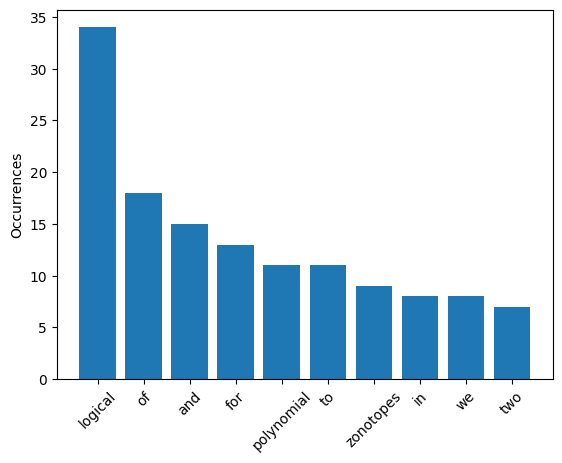

In [6]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.DataFrame.from_dict(word_dict, orient='index', columns=['Occurrences']).sort_values(by='Occurrences',
                                                                                            ascending=False)

top_10 = df.head(10)
plt.bar(top_10.index, top_10['Occurrences'])

plt.ylabel('Occurrences')
# for better readability
plt.xticks(rotation=45)

plt.show()
plt.close()


### Task c: Matrix operations with Numpy
Create Matrix A with random values and vector v from a normal distribution.

In [7]:
import numpy as np

A = np.random.rand(100, 20)

v = np.random.normal(loc=2.0, scale=0.01, size=(20, 1))

We iteratively multiply each row of matrix A element-wise by vector v, and accumulate the results
into a new vector c.

In [8]:
c = np.zeros((20, 1))

for i in range(20):
    x = 0.0
    for j in range(100):
        x += A[j][i] * v[i]
    c[i] = x

Now, we calculate the mean and standard deviation of c using `numpy.mean` and `numpy.std`

In [9]:
mean = np.mean(c)

sdt = np.std(c)

print(f'Mean: {mean:.2f}\nStandard Deviation: {sdt:.2f}')

Mean: 99.79
Standard Deviation: 6.24


Lastly, we plot a histogram of c using 5 bins.

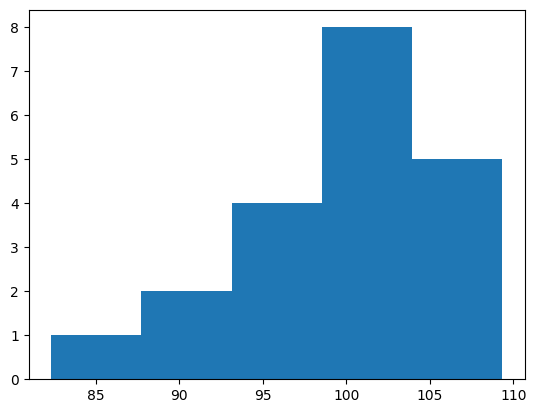

In [10]:
plt.hist(c, bins=5)

plt.show()
plt.close()